In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler 

def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

C:\Users\Aimpr\AppData\Local\Temp\ipykernel_29252\935961860.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


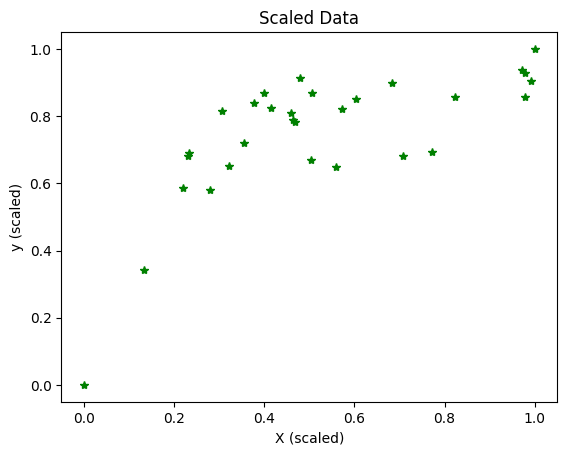

In [3]:

from sklearn.preprocessing import MinMaxScaler

# Generate data
n = 30
X = 6 * np.random.rand(n, 1) - 4
y = (9 + X**2 + 0.5 + X**3 + 10) + np.random.rand(n, 1) * 20

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Plot the scaled data
plt.plot(X, y, 'g*')
plt.xlabel('X (scaled)')
plt.ylabel('y (scaled)')
plt.title('Scaled Data')
plt.show()


In [4]:
output = {}
def normal_cross(degree, X, y):
    kf = KFold(n_splits=10, random_state=1, shuffle=True)

    model = PolynomialRegression(degree)
    val_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
    mse = np.mean(-val_score)
    
   
    output.update({degree:mse})
    result_degree = min(output, key=output.get)
    result_mse = min(output.values())
    
    print(f'Degree: {degree} MSE: {mse}')

    return result_degree

for i in range(9):
    degree = normal_cross(i, X, y)

print(f"Best degree : {degree}")



Degree: 0 MSE: 0.040675754237434664
Degree: 1 MSE: 0.023481235219457476
Degree: 2 MSE: 0.016933721687129696
Degree: 3 MSE: 0.007967817012099719
Degree: 4 MSE: 0.010462996587678037
Degree: 5 MSE: 0.01059027710249068
Degree: 6 MSE: 0.010357315799282233
Degree: 7 MSE: 0.0887625995397058
Degree: 8 MSE: 0.7211976904841634
Best degree : 3


In [61]:
kf1 = KFold(n_splits=3)
kf2 = KFold(n_splits=2)

x_outter_train = []
x_outter_test = []
y_outter_train = []
y_outter_test = []

x_inner_train = []
x_inner_test = []
y_inner_train = []
y_inner_test = []


model_Ridge = Ridge()


degree = [1, 2, 3, 4, 5, 6]

lambd = [0.01, 0.1, 1, 10]

print('Outter Loop:')
for train_index, test_index in kf1.split(X):
    print(train_index, test_index)
    x_outter_train.append(X[train_index])
    x_outter_test.append(X[test_index])
    y_outter_train.append(y[train_index])
    y_outter_test.append(y[test_index])


print('\n')
print('Inter Loop:')

for train_index1, test_index1 in kf2.split(x_outter_train[0]):
    print(train_index1, test_index1)
    x_inner_train.append(x_outter_train[0][train_index1])
    x_inner_test.append(x_outter_train[0][test_index1])
    y_inner_train.append(y_outter_train[0][train_index1])
    y_inner_test.append(x_outter_train[0][test_index1])


for train_index2, test_index2 in kf2.split(x_outter_train[1]):
    print(train_index2, test_index2)
    x_inner_train.append(x_outter_train[1][train_index2])
    x_inner_test.append(x_outter_train[1][test_index2])
    y_inner_train.append(y_outter_train[1][train_index2])
    y_inner_test.append(y_outter_train[1][test_index2])


for train_index3, test_index3 in kf2.split(x_outter_train[2]):
    print(train_index3, test_index3)
    x_inner_train.append(x_outter_train[2][train_index3])
    x_inner_test.append(x_outter_train[2][test_index3])
    y_inner_train.append(y_outter_train[2][train_index3])
    y_inner_test.append(y_outter_train[2][test_index3])
print('\n')
#print(x_inner_train)
# tune_para = []
# best_degrees = []
# for i in degree:
#     model_poly = PolynomialRegression(i)
#     model_poly.fit(x_inner_train[0], y_inner_train[0])
#     y_predict1 = model_poly.predict(x_inner_test[0])
#     score_err1 = mean_squared_error(y_inner_test[0], y_predict1)
#     tune_para.append(score_err1)

    
# best_degree = degree[np.argmin(tune_para)]
# best_degrees.append(best_degree)

# for i in degree:
#     model_poly = PolynomialRegression(i)
#     model_poly.fit(x_inner_train[1], y_inner_train[1])
#     y_predict2 = model_poly.predict(x_inner_test[1])
#     score_err2 = mean_squared_error(y_inner_test[1], y_predict2)
#     print(i, round(score_err2, 4))

best_degrees = []
degrees1 = []
degrees2 = []
degrees3 = []
degrees4 = []
degrees5 = []
degrees6 = []

lamb1 = []
lamb2 = []
lamb3 = []
lamb4 = []



for i in range(len(x_inner_train)):
    tune_para1 = []
    tune_para2 = []

    for deg in degree:
        model_poly = PolynomialRegression(deg)
        model_poly.fit(x_inner_train[i], y_inner_train[i])
        y_predict1 = model_poly.predict(x_inner_test[i])
        score_err1 = mean_squared_error(y_inner_test[i], y_predict1)
        tune_para1.append(score_err1)

    
    #print(tune_para1)
    degrees1.append(tune_para1[0])
    #print(degrees1[:2])
    #print(degrees1[2:4])
    #print(degrees1[4:6])
    degrees2.append(tune_para1[1])
    
    degrees3.append(tune_para1[2])
    degrees4.append(tune_para1[3])
    degrees5.append(tune_para1[4])
    degrees6.append(tune_para1[5])

    # for lamb in lambd:
    #     model_ridge = Ridge(lamb)
    #     model_ridge.fit(x_inner_train[i], y_inner_train[i])
    #     y_predict2 = model_poly.predict(x_inner_test[i])
    #     score_err2 = mean_squared_error(y_inner_test[i], y_predict2)
    #     tune_para2.append(score_err2)

    # print(tune_para2)
    # lamb1.append(tune_para2[0])
    # lamb2.append(tune_para2[1])
    # lamb3.append(tune_para2[2])
    # lamb4.append(tune_para2[3])
d1_1 = np.mean(degrees1[:2])
d1_2 = np.mean(degrees1[2:4])
d1_3 = np.mean(degrees1[4:6])
print("Degree 1 :", d1_1)
print("Degree 1 :", d1_2)
print("Degree 1 :", d1_3)
print('\n')

print("Degree 2 :",np.mean(degrees2[:2]))
print("Degree 2 :",np.mean(degrees2[2:4]))
print("Degree 2 :",np.mean(degrees2[4:6]))
print('\n')

print("Degree 3 :",np.mean(degrees3[:2]))
print("Degree 3 :",np.mean(degrees3[2:4]))
print("Degree 3 :",np.mean(degrees3[4:6]))
print('\n')

print("Degree 4 :",np.mean(degrees4[:2]))
print("Degree 4 :",np.mean(degrees4[2:4]))
print("Degree 4 :",np.mean(degrees4[4:6]))
print('\n')

print("Degree 5 :",np.mean(degrees5[:2]))
print("Degree 5 :",np.mean(degrees5[2:4]))
print("Degree 5 :",np.mean(degrees5[4:6]))
print('\n')

print("Degree 6 :",np.mean(degrees6[:2]))
print("Degree 6 :",np.mean(degrees6[2:4]))
print("Degree 6 :",np.mean(degrees6[4:6]))
print('\n')

# print("lambda 0.01 :",np.mean(lamb1))
# print("lambda 0.1 :",np.mean(lamb2))
# print("lambda 1 :",np.mean(lamb3))
# print("lambda 10 :",np.mean(lamb4))


score_error1 = []
score_error2 = []

for i in range(len(x_outter_train)):
    model_poly = PolynomialRegression(3)
    model_poly.fit(x_outter_train[i], y_outter_train[i])
    y_pred1 = model_poly.predict(x_outter_test[i])
    score1 = mean_squared_error(y_outter_test[i], y_pred1)
    score_error1.append(score1)
    
    # model_poly.fit(x_data_train[i], y_data_train[i])
    # y_pred2 = model_poly.predict(x_data_test[i])
    # score2 = mean_squared_error(y_data_test[i], y_pred2)
    # score_error2.append(score2)
    
print("Mean Squared Errors:", score_error1)
print("Mean Squared Errors:", np.mean(score_error1))
# print("Mean Squared Errors:", score_error2)


Outter Loop:
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29] [10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24 25 26 27 28 29]


Inter Loop:
[10 11 12 13 14 15 16 17 18 19] [0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]
[10 11 12 13 14 15 16 17 18 19] [0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]
[10 11 12 13 14 15 16 17 18 19] [0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]


Degree 1 : 0.09201095241935946
Degree 1 : 0.03422703610835891
Degree 1 : 0.03150909827902186


Degree 2 : 0.09598523803198009
Degree 2 : 0.023074910405661675
Degree 2 : 0.018329064725202186


Degree 3 : 0.10495619927653216
Degree 3 : 0.01167321136429332
Degree 3 : 0.009714176156700064


Degree 4 : 0.1096409593734056
Degree 4 : 0.024224964227357672
Degree 4 : 0.016461241574

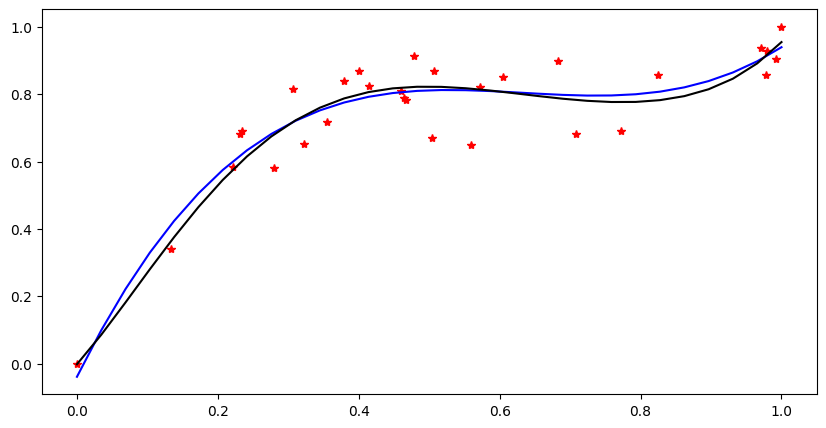

In [6]:
## test ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_range = np.linspace(X.min(), X.max(), n)[:, np.newaxis]
# y_range_pred1 = Ridge(5).fit(X_train, y_train).predict(X_range)

y_range_pred2 = PolynomialRegression(3).fit(X_train, y_train).predict(X_range)
y_range_pred3 = PolynomialRegression(6).fit(X_train, y_train).predict(X_range)



plt.figure(figsize=(10,5))

plt.plot(X, y, 'r*')
# plt.plot(X_range, y_range_pred1, 'g-')
plt.plot(X_range, y_range_pred2, 'b-')
plt.plot(X_range, y_range_pred3, 'k-')